### Baseline

In [1]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")
from utils import *
import warnings
warnings.filterwarnings("ignore")
import os
import psutil

pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 
from catboost import CatBoostClassifier, Pool

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)
    

In [5]:
''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [6]:
param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

In [7]:
model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)

0.7788860677845505


<Axes: title={'center': 'Top 20 features'}>

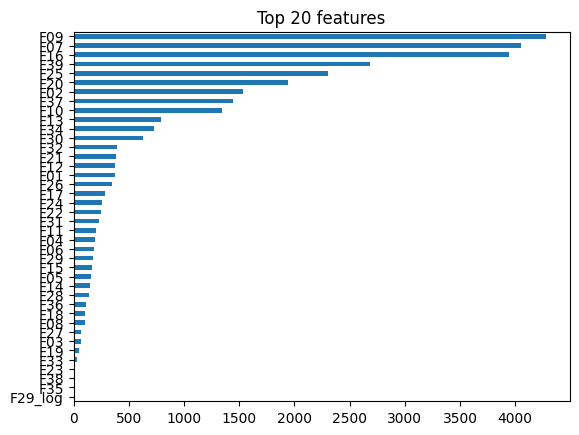

In [9]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

### log 변환

In [3]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:32<00:00,  1.26s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8947.91 MB
Memory usage after optimization is: 6683.66 MB
Decreased by 25.3%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:05<00:00,  5.17it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1385.05 MB
Memory usage after optimization is: 1047.45 MB
Decreased by 24.4%
0.7788860677845505


<Axes: title={'center': 'Top 20 features'}>

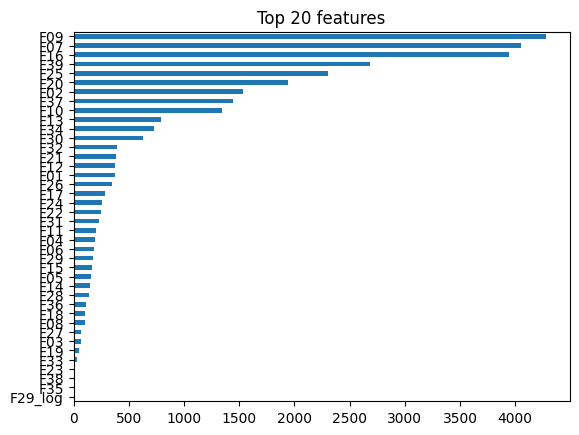

In [4]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

In [ ]:
''' Submission '''
pred = model.predict_proba(test)
sample_submission = pd.read_csv('/home/workspace/DACON/Click_predict/data/sample_submission.csv')
sample_submission['Click'] = pred[:, 1]
sample_submission.to_csv('lgbm_HP_Tunning.csv', index=False)

### 09+07 

In [3]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:31<00:00,  1.22s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8947.91 MB
Memory usage after optimization is: 6847.34 MB
Decreased by 23.5%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.30it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1385.05 MB
Memory usage after optimization is: 1073.42 MB
Decreased by 22.5%
0.7786959062427954


<Axes: title={'center': 'Top 20 features'}>

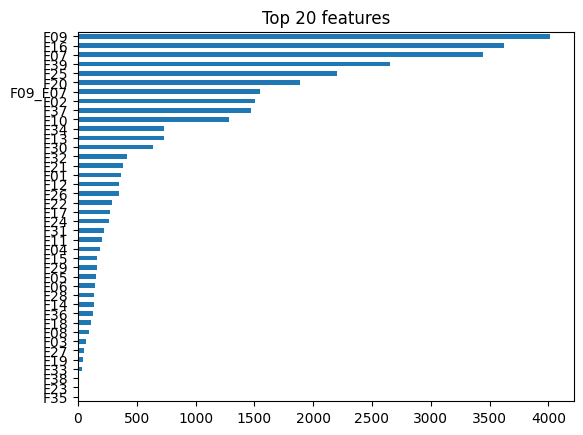

In [4]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

### F09+F25 새로운 피처 생성

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:33<00:00,  1.27s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8947.91 MB
Memory usage after optimization is: 6847.34 MB
Decreased by 23.5%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.21it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1385.05 MB
Memory usage after optimization is: 1073.42 MB
Decreased by 22.5%
0.7787953305452985


<Axes: title={'center': 'Top 20 features'}>

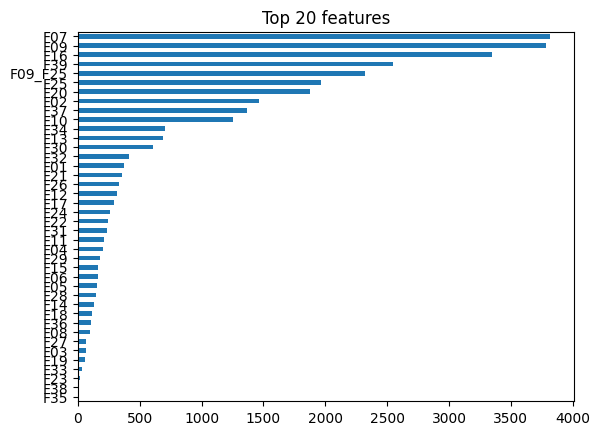

In [3]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

### F27, F29 결측값 가진 열 제거  

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:32<00:00,  1.26s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8293.19 MB
Memory usage after optimization is: 6519.97 MB
Decreased by 21.4%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.22it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1281.17 MB
Memory usage after optimization is: 1021.48 MB
Decreased by 20.3%
0.7750015628837232


### F03  F15  F20 F26 (34%) 27 29(40%) 결측값 가진 열 제거 


In [3]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:39<00:00,  1.51s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8293.19 MB
Memory usage after optimization is: 6519.97 MB
Decreased by 21.4%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:05<00:00,  5.04it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1281.17 MB
Memory usage after optimization is: 1021.48 MB
Decreased by 20.3%
0.7750015628837232


### 27 29 ADD

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:34<00:00,  1.32s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8947.91 MB
Memory usage after optimization is: 6683.66 MB
Decreased by 25.3%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:05<00:00,  5.01it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1385.05 MB
Memory usage after optimization is: 1047.45 MB
Decreased by 24.4%
0.7790372912643618


In [3]:
pred = model.predict_proba(test)
''' Submission '''
sample_submission = pd.read_csv('/home/workspace/DACON/Click_predict/data/sample_submission.csv')
sample_submission['Click'] = pred[:, 1]
sample_submission.to_csv('lgbm_Add2729.csv', index=False)

### 27 29 mul

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:31<00:00,  1.22s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8947.91 MB
Memory usage after optimization is: 6738.22 MB
Decreased by 24.7%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.23it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1385.05 MB
Memory usage after optimization is: 1056.10 MB
Decreased by 23.7%
0.7787811146087096


In [ ]:
pred = model.predict_proba(test)

### 27 29 add & mul 

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:33<00:00,  1.29s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 9166.16 MB
Memory usage after optimization is: 6792.78 MB
Decreased by 25.9%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.22it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1419.68 MB
Memory usage after optimization is: 1064.76 MB
Decreased by 25.0%
0.7787736865402091


### F32 스케일링

In [2]:
''' Data Load '''
train, test = load_data()

''' scaling '''
max = train['F32'].max()
min = train['F32'].min()
train['F32'] = (train['F32']-min)/(max-min)

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:33<00:00,  1.27s/it]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 8947.91 MB
Memory usage after optimization is: 6629.10 MB
Decreased by 25.9%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:05<00:00,  5.08it/s]


---------------- Start Category ----------------
---------------- Change Dtype ----------------
Memory usage of dataframe is 1385.05 MB
Memory usage after optimization is: 1047.45 MB
Decreased by 24.4%
0.7786463684551811
